In [213]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter('ignore')
from sklearn.ensemble import RandomForestClassifier


In [214]:
df= pd.read_csv("/content/drive/MyDrive/turnover.csv")

In [215]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [216]:
df.shape

(14999, 10)

In [217]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [219]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [220]:
df[df.duplicated(keep=False)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [221]:
df.drop_duplicates(inplace=True)

In [222]:
df.shape

(11991, 10)

In [223]:
df.isnull().sum()/len(df)*100

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
sales                    0.0
salary                   0.0
dtype: float64

In [224]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


<Axes: >

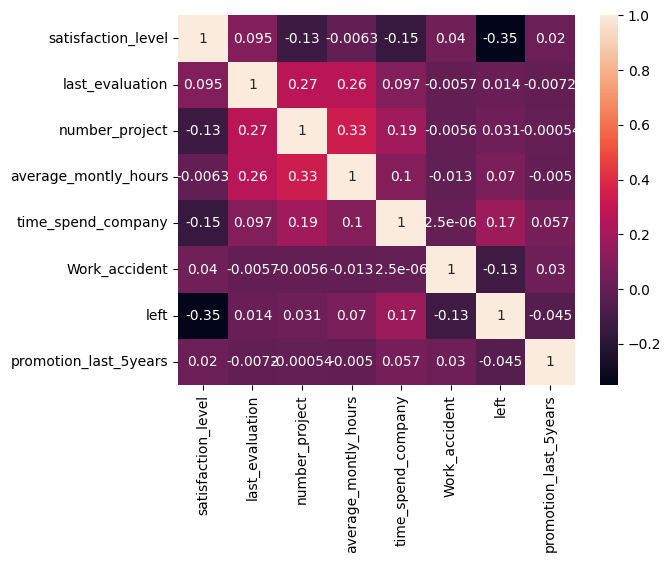

In [225]:
sns.heatmap(df.corr(),annot=True)


In [226]:
df.skew()

satisfaction_level      -0.538702
last_evaluation         -0.031686
number_project           0.332152
average_montly_hours     0.027208
time_spend_company       1.816577
Work_accident            1.914410
left                     1.795135
promotion_last_5years    7.490008
dtype: float64

<Axes: xlabel='average_montly_hours', ylabel='Density'>

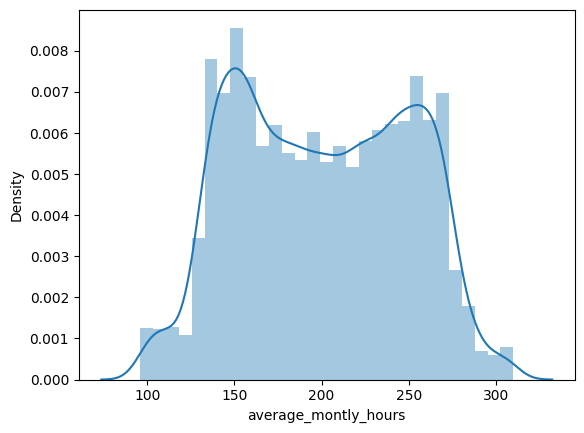

In [227]:
sns.distplot(df['average_montly_hours'])

<Axes: xlabel='promotion_last_5years', ylabel='Density'>

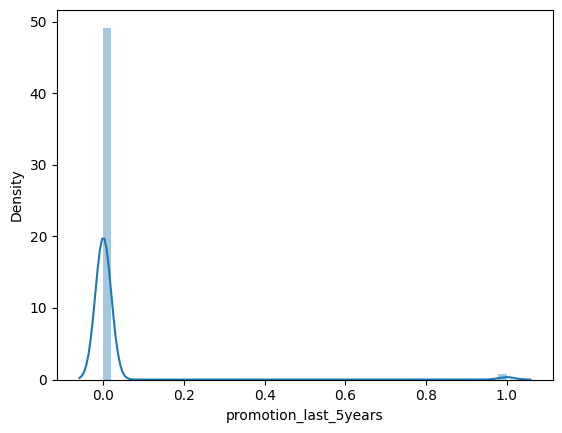

In [228]:
sns.distplot(df['promotion_last_5years'])

<Axes: xlabel='satisfaction_level', ylabel='Density'>

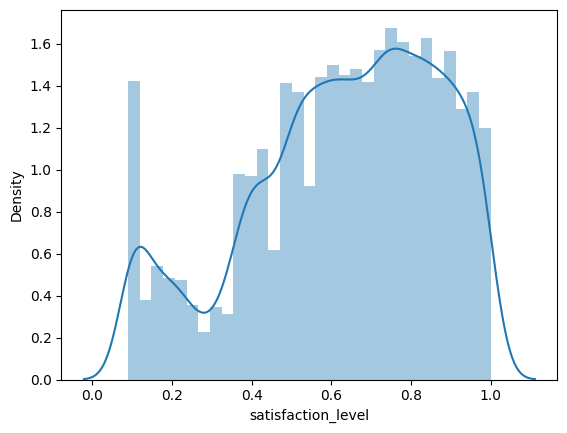

In [229]:
sns.distplot(df['satisfaction_level'])

<Axes: xlabel='last_evaluation', ylabel='Density'>

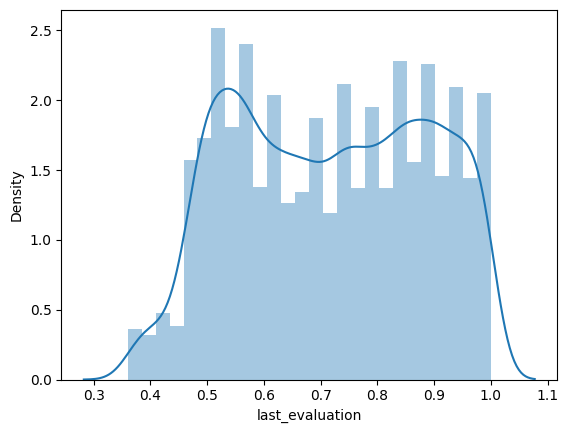

In [230]:
sns.distplot(df['last_evaluation'])

In [231]:
 df['satisfaction_level']=np.log(df['satisfaction_level'])

In [232]:
df['satisfaction_level']

0       -0.967584
1       -0.223144
2       -2.207275
3       -0.328504
4       -0.994252
           ...   
11995   -0.105361
11996   -0.301105
11997   -0.162519
11998   -1.108663
11999   -0.693147
Name: satisfaction_level, Length: 11991, dtype: float64

In [233]:
# df['promotion_last_5years']=np.log(df['promotion_last_5years'])

In [234]:
df['promotion_last_5years'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
11995    False
11996    False
11997    False
11998    False
11999    False
Name: promotion_last_5years, Length: 11991, dtype: bool

In [235]:
df['promotion_last_5years'].unique()

array([0, 1])

In [236]:
df['promotion_last_5years']=df['promotion_last_5years'].astype(str)

In [237]:
df['promotion_last_5years'].dtype

dtype('O')

In [238]:
df['promotion_last_5years']=df['promotion_last_5years'].str.replace('-inf','0')

In [239]:
df['promotion_last_5years'].skew()

7.490008118269382

In [240]:
df['promotion_last_5years'].fillna(0,inplace=True)

In [241]:
df['promotion_last_5years']

0        0
1        0
2        0
3        0
4        0
        ..
11995    1
11996    1
11997    1
11998    1
11999    0
Name: promotion_last_5years, Length: 11991, dtype: object

In [242]:
#sns.countplot(df['left'])

<Axes: >

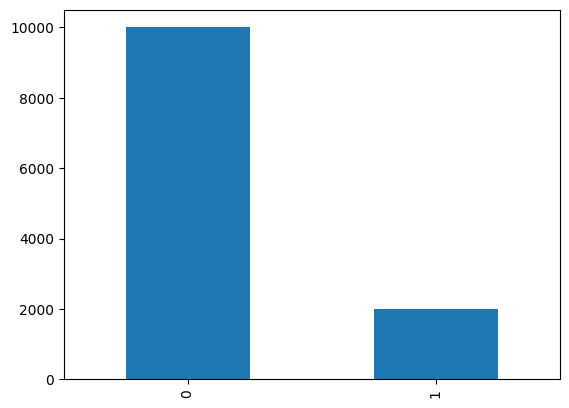

In [243]:
df['left'].value_counts().plot(kind='bar')

<Axes: xlabel='left', ylabel='count'>

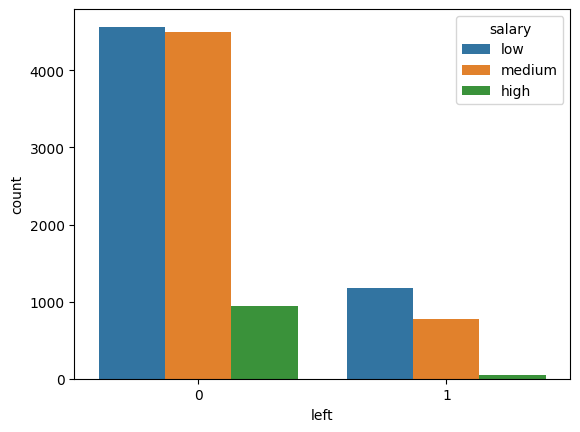

In [244]:
sns.countplot(x=df["left"],hue=df['salary'])

<Axes: xlabel='left', ylabel='count'>

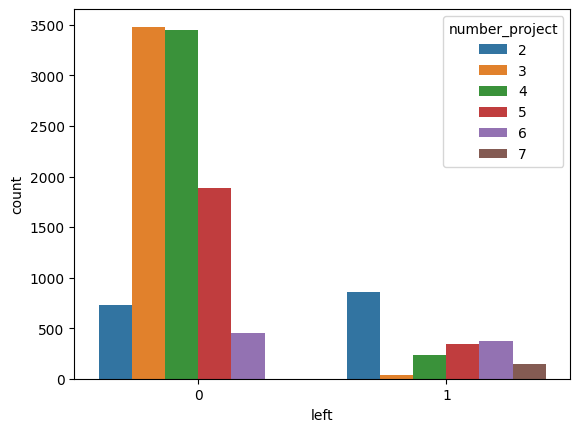

In [245]:
sns.countplot(x=df["left"],hue=df['number_project'])

<Axes: xlabel='left', ylabel='count'>

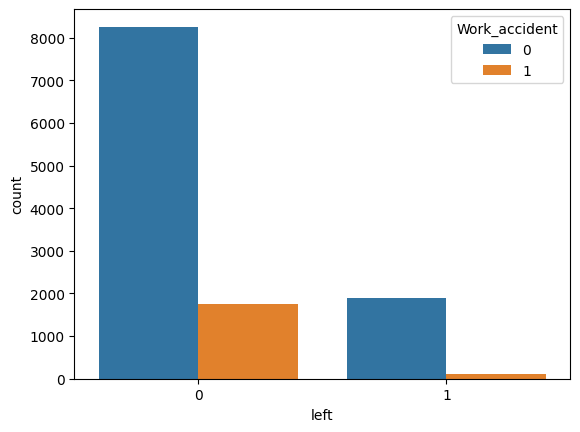

In [246]:
sns.countplot(x=df["left"],hue=df['Work_accident'])

In [247]:
def outlier(values):
  Q1 = values.quantile(0.25)
  Q3 = values.quantile(0.75)
  IQR = Q3-Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  lower_limit,upper_limit
  print("IQR,lower_limit,upper_limit")
  return IQR,lower_limit,upper_limit

In [248]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

<Axes: >

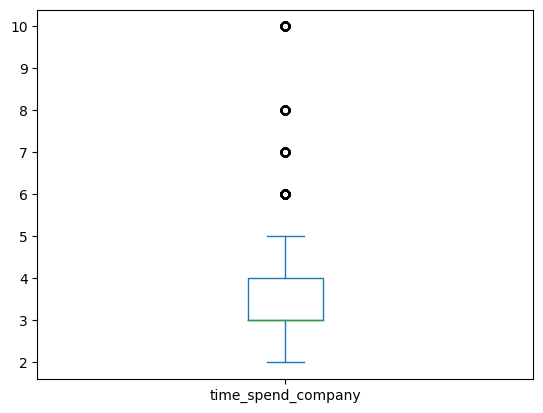

In [249]:
df['time_spend_company'].plot.box()

<Axes: >

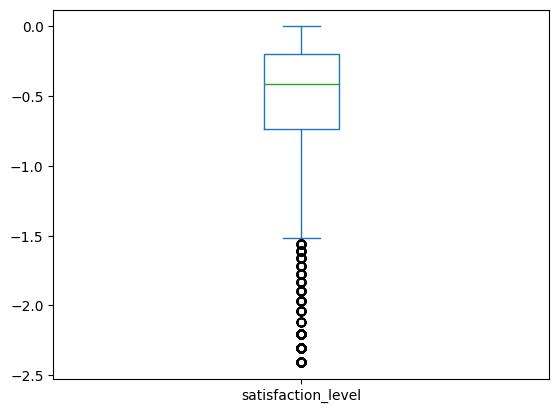

In [250]:
df['satisfaction_level'].plot.box()

<Axes: >

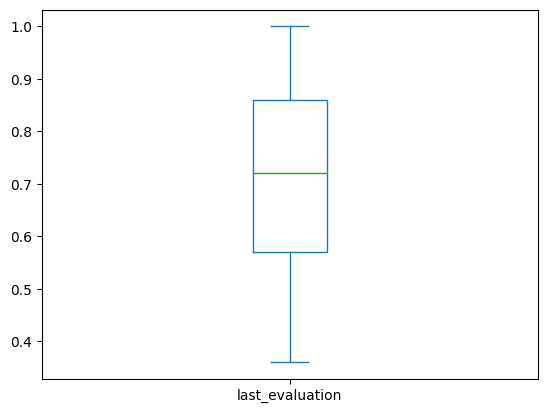

In [251]:
df['last_evaluation'].plot.box()

<Axes: >

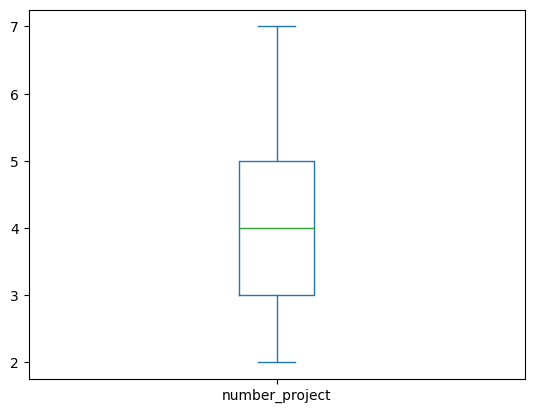

In [252]:
df['number_project'].plot.box()

In [253]:
outlier(df['satisfaction_level'])

IQR,lower_limit,upper_limit


(0.5355182363563621, -1.5372465296147435, 0.6048264158107047)

In [254]:
df['satisfaction_level'].quantile(.25)

-0.7339691750802004

In [255]:
outlier(df['time_spend_company'])

IQR,lower_limit,upper_limit


(1.0, 1.5, 5.5)

In [256]:
Q1 = df['time_spend_company'].quantile(0.25)
Q3 = df['time_spend_company'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
df=df[(df['time_spend_company']>=lower_limit)& (df['time_spend_company']<=upper_limit)]
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,-0.967584,0.53,2,157,3,0,1,0,sales,low
2,-2.207275,0.88,7,272,4,0,1,0,sales,medium
3,-0.328504,0.87,5,223,5,0,1,0,sales,low
4,-0.994252,0.52,2,159,3,0,1,0,sales,low
5,-0.891598,0.50,2,153,3,0,1,0,sales,low


<Axes: >

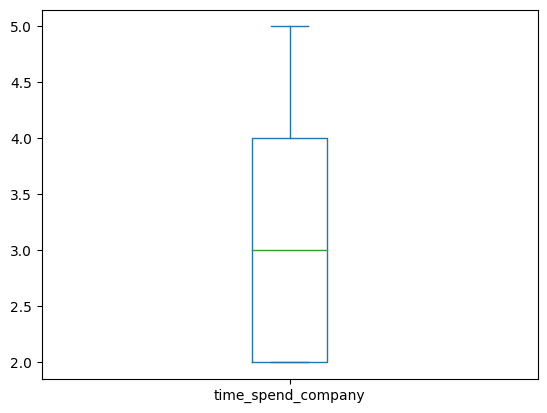

In [257]:
(df['time_spend_company']).plot.box()

In [258]:
Q1 = df['satisfaction_level'].quantile(0.25)
Q3 = df['satisfaction_level'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
df=df[(df['satisfaction_level']>=lower_limit)& (df['satisfaction_level']<=upper_limit)]
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,-0.967584,0.53,2,157,3,0,1,0,sales,low
3,-0.328504,0.87,5,223,5,0,1,0,sales,low
4,-0.994252,0.52,2,159,3,0,1,0,sales,low
5,-0.891598,0.50,2,153,3,0,1,0,sales,low
7,-0.083382,0.85,5,259,5,0,1,0,sales,low


<Axes: >

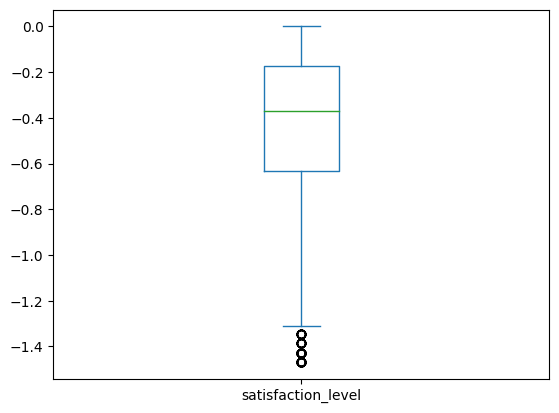

In [259]:
df['satisfaction_level'].plot.box()

In [260]:
encoder = LabelEncoder()
df['sales'] = encoder.fit_transform(df['sales'])
df['salary'] = encoder.fit_transform(df['salary'])

In [261]:
x= df.drop('left', axis=1)
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,-0.967584,0.53,2,157,3,0,0,7,1
3,-0.328504,0.87,5,223,5,0,0,7,1
4,-0.994252,0.52,2,159,3,0,0,7,1
5,-0.891598,0.50,2,153,3,0,0,7,1
7,-0.083382,0.85,5,259,5,0,0,7,1
...,...,...,...,...,...,...,...,...,...
11984,-0.653926,0.61,4,187,4,1,0,7,2
11985,-0.328504,0.64,4,192,3,0,0,7,2
11986,-0.733969,0.50,5,142,4,0,0,0,2
11992,-0.478036,0.85,3,237,3,1,0,0,2


In [262]:
y=df['left']
y

0        1
3        1
4        1
5        1
7        1
        ..
11984    0
11985    0
11986    0
11992    0
11999    0
Name: left, Length: 10184, dtype: int64

In [263]:
# Oversampling
ros = RandomOverSampler(random_state=42)
ros.fit(x,y)
x_resampled, y_resampled  = ros.fit_resample(x,y)
resampled_df = pd.concat([pd.DataFrame(x_resampled, columns=x.columns), pd.Series(y_resampled, name='Class')], axis=1)

In [264]:
x = resampled_df.drop(columns=['Class'])
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,-0.967584,0.53,2,157,3,0,0,7,1
1,-0.328504,0.87,5,223,5,0,0,7,1
2,-0.994252,0.52,2,159,3,0,0,7,1
3,-0.891598,0.50,2,153,3,0,0,7,1
4,-0.083382,0.85,5,259,5,0,0,7,1


In [265]:
y = resampled_df['Class']
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
17647    1
17648    1
17649    1
17650    1
17651    1
Name: Class, Length: 17652, dtype: int64


In [266]:
#splitting data into train test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
print(x.shape, x_train.shape, x_test.shape)

(17652, 9) (14121, 9) (3531, 9)


<Axes: >

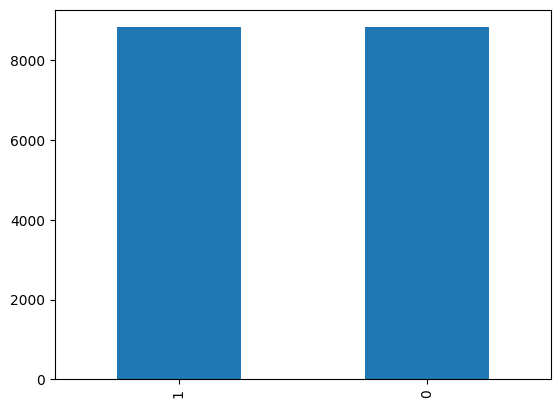

In [267]:
y_resampled.value_counts().plot(kind='bar')

In [268]:
#splitting data into train test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
print(x.shape, x_train.shape, x_test.shape)

(17652, 9) (14121, 9) (3531, 9)


In [269]:
# converting categorical columns into numerical
# for col in df.columns:
#     if df[col].dtypes == 'object':
#         encoder = LabelEncoder()
#         df[col] = encoder.fit_transform(df[col])

In [270]:
#  df['sales'] = df['sales'].astype(str)

In [271]:
#  df['salary'] = df['salary'].astype(str)

In [272]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,-0.967584,0.53,2,157,3,0,0,7,1
1,-0.328504,0.87,5,223,5,0,0,7,1
2,-0.994252,0.52,2,159,3,0,0,7,1
3,-0.891598,0.50,2,153,3,0,0,7,1
4,-0.083382,0.85,5,259,5,0,0,7,1


In [273]:
#model training
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [274]:
#accuracy on training data
x_train_prediction = LR.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)
#Accuracy on test data
x_test_prediction = LR.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.8614120812973586
Accuracy on test data: 0.8521665250637214


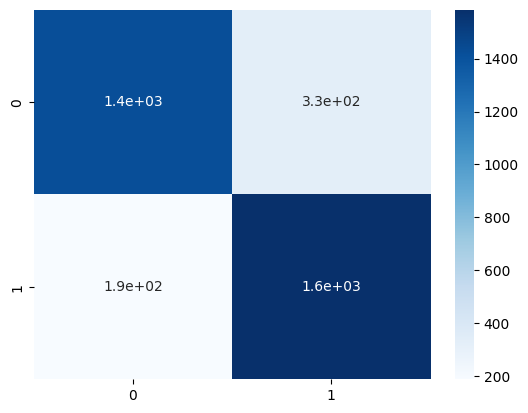

<Axes: >

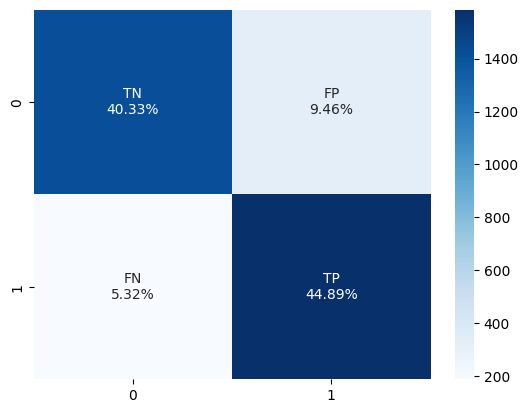

In [275]:
arr=confusion_matrix(y_test, x_test_prediction)

sns.heatmap(arr, annot=True, cmap='Blues')
plt.show()

################
gnames = ['TN','FP','FN','TP'] #labeling the map
gper = ["{0:.2%}".format(x) for x in (arr.flatten()/np.sum(arr))] #calculation of percentage of positives and negative

labels = [f"{v1}\n{v2}" for v1, v2 in zip(gnames,gper)] #mapping labels with their percentages
labels = np.asarray(labels).reshape(2,2) #reshaping the matrix

sns.heatmap(arr, annot=labels, fmt='', cmap='Blues')

In [276]:
#printing classification report precision, recall, f1-score
print(classification_report(x_test_prediction, y_test))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1612
           1       0.89      0.83      0.86      1919

    accuracy                           0.85      3531
   macro avg       0.85      0.85      0.85      3531
weighted avg       0.86      0.85      0.85      3531



In [277]:
arr

array([[1424,  334],
       [ 188, 1585]])

In [278]:
#calculating the predicted probability for Logistic Regression
y_hat = LR.predict_proba(x_test)[:,1]

#defining thresold score
thresholds = np.linspace(0,1,100)

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
LR_roc_auc = roc_auc_score(y_test, LR.predict(x_test))
LR_roc_auc

0.851988203792573

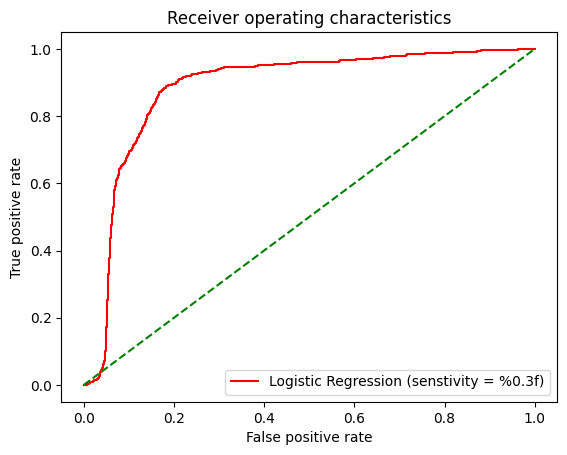

In [279]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (senstivity = %0.3f)',color='r' %LR_roc_auc)
plt.plot([0,1],[0,1], 'g--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

In [280]:
# cross validation score
scores = cross_val_score(LR, x_train,y_train,cv=3)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


cross-validation_scores:  [0.87125558 0.86212025 0.86721904]
0.87 accuracy with a standard deviation of 0.00


In [281]:
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17652 entries, 0 to 17651
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     17652 non-null  float64
 1   last_evaluation        17652 non-null  float64
 2   number_project         17652 non-null  int64  
 3   average_montly_hours   17652 non-null  int64  
 4   time_spend_company     17652 non-null  int64  
 5   Work_accident          17652 non-null  int64  
 6   promotion_last_5years  17652 non-null  object 
 7   sales                  17652 non-null  int64  
 8   salary                 17652 non-null  int64  
 9   Class                  17652 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.3+ MB


In [282]:
x_train['promotion_last_5years']=x_train['promotion_last_5years'].astype('int64')
x_test['promotion_last_5years']=x_test['promotion_last_5years'].astype('int64')

In [283]:
xgb = xgb.XGBClassifier()
xgb.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [284]:
#accuracy on training data
x_train_prediction = xgb.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = xgb.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.9995042843991219
Accuracy on test data: 0.9932030586236194


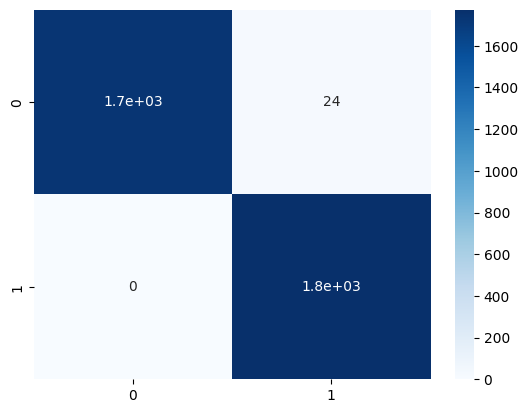

<Axes: >

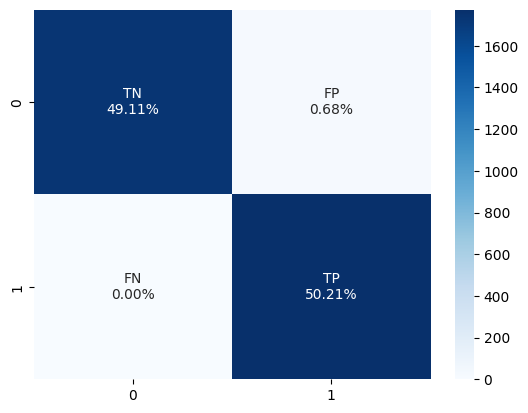

In [285]:
arr=confusion_matrix(y_test, x_test_prediction)

sns.heatmap(arr, annot=True, cmap='Blues')
plt.show()

################
gnames = ['TN','FP','FN','TP'] #labeling the map
gper = ["{0:.2%}".format(x) for x in (arr.flatten()/np.sum(arr))] #calculation of percentage of positives and negative

labels = [f"{v1}\n{v2}" for v1, v2 in zip(gnames,gper)] #mapping labels with their percentages
labels = np.asarray(labels).reshape(2,2) #reshaping the matrix

sns.heatmap(arr, annot=labels, fmt='', cmap='Blues')

In [286]:
#calculating the predicted probability for Logistic Regression
y_hat = xgb.predict_proba(x_test)[:,1]

#defining thresold score
thresholds = np.linspace(0,1,100)

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
xgb_roc_auc = roc_auc_score(y_test, xgb.predict(x_test))
xgb_roc_auc

0.9931740614334471

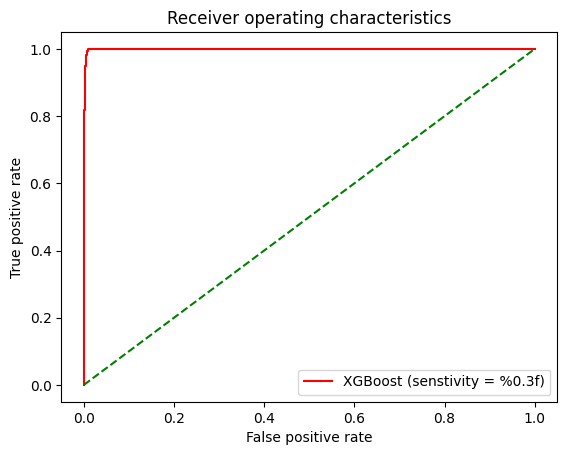

In [287]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (senstivity = %0.3f)',color='r' %xgb_roc_auc)
plt.plot([0,1],[0,1], 'g--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

In [288]:

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)



DecisionTreeClassifier()

In [289]:
#accuracy on training data
x_train_prediction = DT.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = DT.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 1.0
Accuracy on test data: 0.9903709997167941


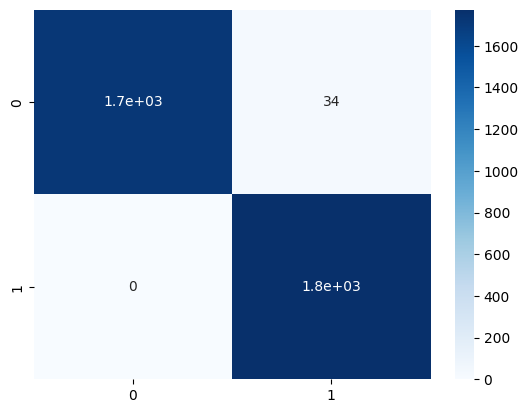

<Axes: >

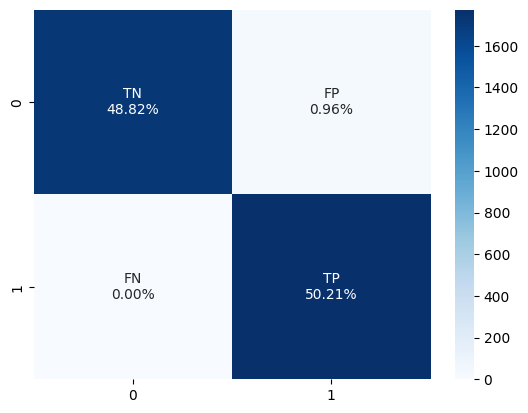

In [290]:
arr=confusion_matrix(y_test, x_test_prediction)

sns.heatmap(arr, annot=True, cmap='Blues')
plt.show()

################
gnames = ['TN','FP','FN','TP'] #labeling the map
gper = ["{0:.2%}".format(x) for x in (arr.flatten()/np.sum(arr))] #calculation of percentage of positives and negative

labels = [f"{v1}\n{v2}" for v1, v2 in zip(gnames,gper)] #mapping labels with their percentages
labels = np.asarray(labels).reshape(2,2) #reshaping the matrix

sns.heatmap(arr, annot=labels, fmt='', cmap='Blues')

In [291]:
#printing classification report precision, recall, f1-score
print(classification_report(x_test_prediction, y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1724
           1       1.00      0.98      0.99      1807

    accuracy                           0.99      3531
   macro avg       0.99      0.99      0.99      3531
weighted avg       0.99      0.99      0.99      3531



In [292]:
#calculating the predicted probability for Logistic Regression
y_hat = DT.predict_proba(x_test)[:,1]

#defining thresold score
thresholds = np.linspace(0,1,100)

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
DT_roc_auc = roc_auc_score(y_test, DT.predict(x_test))
DT_roc_auc

0.99032992036405

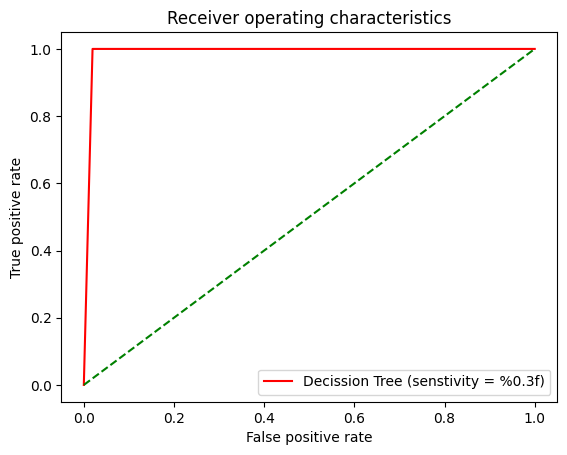

In [293]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='Decission Tree (senstivity = %0.3f)',color='r' %DT_roc_auc)
plt.plot([0,1],[0,1], 'g--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

In [294]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [295]:
#accuracy on training data
x_train_prediction = RF.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)
#Accuracy on test data
x_test_prediction = RF.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 1.0
Accuracy on test data: 0.9983007646559049


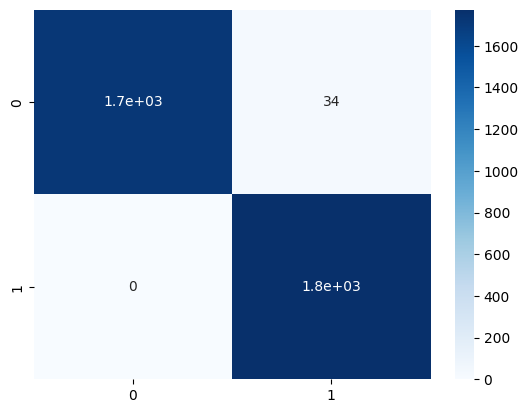

<Axes: >

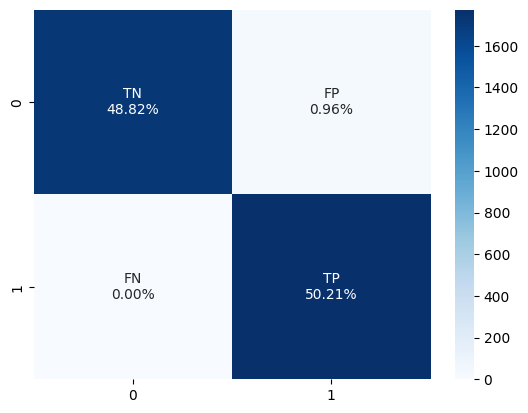

In [296]:
rr=confusion_matrix(y_test, x_test_prediction)

sns.heatmap(arr, annot=True, cmap='Blues')
plt.show()

################
gnames = ['TN','FP','FN','TP'] #labeling the map
gper = ["{0:.2%}".format(x) for x in (arr.flatten()/np.sum(arr))] #calculation of percentage of positives and negative

labels = [f"{v1}\n{v2}" for v1, v2 in zip(gnames,gper)] #mapping labels with their percentages
labels = np.asarray(labels).reshape(2,2) #reshaping the matrix

sns.heatmap(arr, annot=labels, fmt='', cmap='Blues')

In [297]:
#printing classification report precision, recall, f1-score
print(classification_report(x_test_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1752
           1       1.00      1.00      1.00      1779

    accuracy                           1.00      3531
   macro avg       1.00      1.00      1.00      3531
weighted avg       1.00      1.00      1.00      3531



In [298]:
#calculating the predicted probability for Logistic Regression
y_hat = RF.predict_proba(x_test)[:,1]

#defining thresold score
thresholds = np.linspace(0,1,100)

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
RF_roc_auc = roc_auc_score(y_test, RF.predict(x_test))
RF_roc_auc

0.9982935153583617

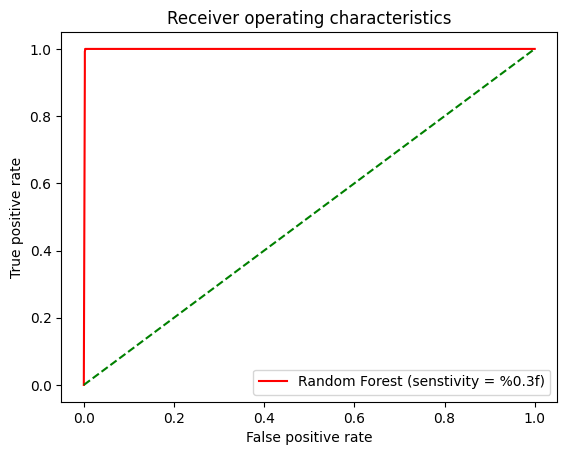

In [299]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (senstivity = %0.3f)',color='r' %RF_roc_auc)
plt.plot([0,1],[0,1], 'g--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

In [300]:
# cross validation score
scores = cross_val_score(LR, x_train,y_train,cv=3)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


cross-validation_scores:  [0.87125558 0.86212025 0.86721904]
0.87 accuracy with a standard deviation of 0.00


In [301]:
#Hypertuning
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

RF_tuned = RandomForestClassifier(random_state=42)

RF_cv = RandomizedSearchCV(
    estimator=RF_tuned, param_distributions=param_dist, cv=5, random_state=42)

RF_cv.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [302]:

RF_cv.best_score_

0.9980171726541152

In [303]:
RF_cv.best_params_

{'n_estimators': 40, 'max_depth': 102}

In [304]:
RF_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [305]:

RF_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [306]:

#accuracy on training data
x_train_prediction = RF_best.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = RF_best.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)


Accuracy on training data: 0.9999291834855888
Accuracy on test data: 0.9983007646559049


In [307]:
#printing classification report precision, recall, f1-score
print(classification_report(x_test_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1752
           1       1.00      1.00      1.00      1779

    accuracy                           1.00      3531
   macro avg       1.00      1.00      1.00      3531
weighted avg       1.00      1.00      1.00      3531



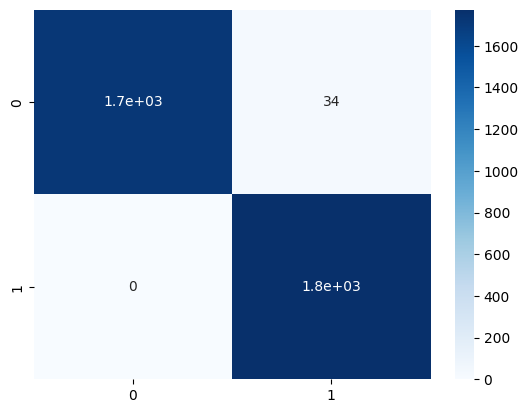

<Axes: >

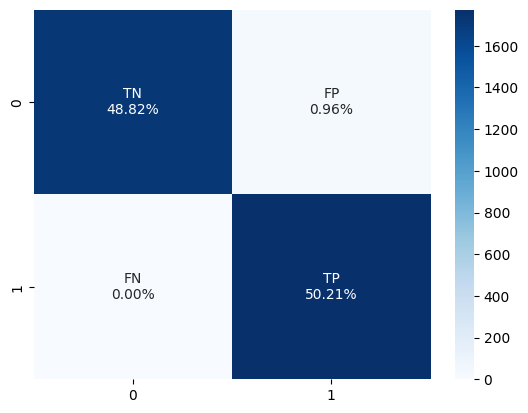

In [308]:
rr=confusion_matrix(y_test, x_test_prediction)

sns.heatmap(arr, annot=True, cmap='Blues')
plt.show()

################
gnames = ['TN','FP','FN','TP'] #labeling the map
gper = ["{0:.2%}".format(x) for x in (arr.flatten()/np.sum(arr))] #calculation of percentage of positives and negative

labels = [f"{v1}\n{v2}" for v1, v2 in zip(gnames,gper)] #mapping labels with their percentages
labels = np.asarray(labels).reshape(2,2) #reshaping the matrix

sns.heatmap(arr, annot=labels, fmt='', cmap='Blues')

In [311]:
#pd.DataFrame(RF_best.predict_proba(x_test))